# Bayesian Optimization with George

* [George: Fast and flexible Gaussian Process regression in Python](https://github.com/dfm/george)
* [Bayesian Optimization Tutorial](http://george.readthedocs.io/en/latest/tutorials/bayesopt)

In [1]:
import george
george.__version__

'0.4.0'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from bog import bayes_minimize_1D, bayes_minimize
from george.kernels import Matern32Kernel

In [3]:
def test_objective_1D(x):
    return -0.5*np.exp(-0.5*(x-2)**2)-0.5*np.exp(-0.5*(x + 2.1)**2/5)+0.3

In [4]:
def test_objective_2D(x):
    x1, x2 = x
    return test_objective_1D(x1) + test_objective_1D(x2)

## 1D Test Case

location of minimum: [1.82978637]
25 model evaluations


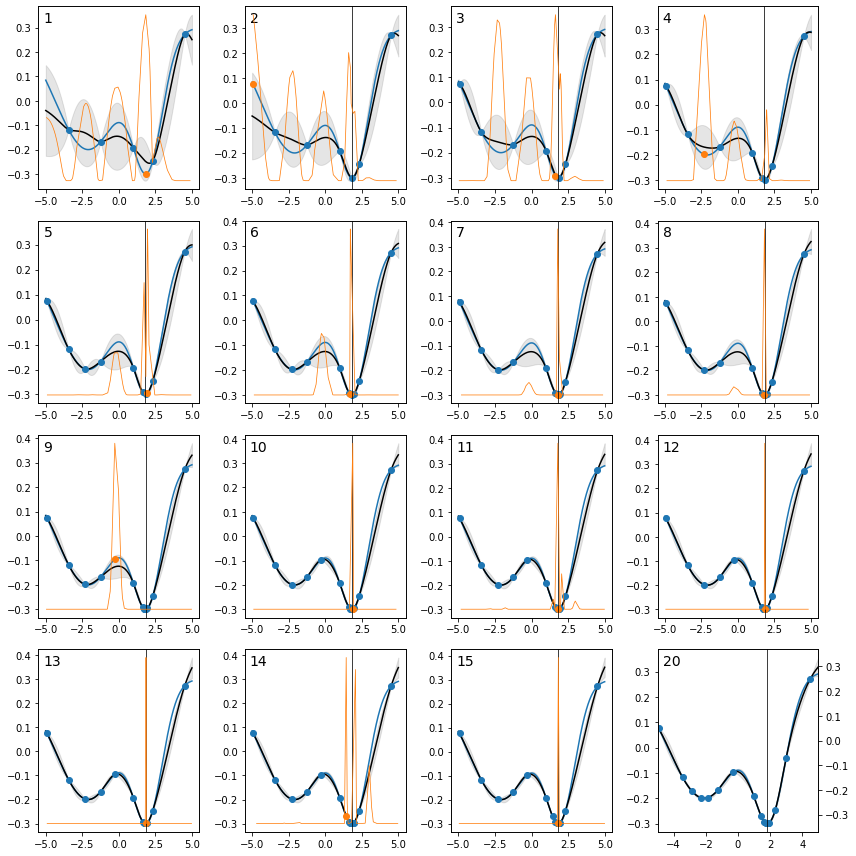

In [5]:
np.random.seed(42)

n_panel = 4
fig, axes = plt.subplots(n_panel, n_panel, figsize=(12, 12))

result = bayes_minimize_1D(test_objective_1D,
    n_iter=100, rtol=1e-6,
    bounds=np.array([-5, 5]),
    kernel=Matern32Kernel(1),
    plot_args=(axes, np.linspace(-5, 5, 5000)),
    warnings=False, full_output=True)

print(f"location of minimum: {result[0]}")
print(f"{len(result[2])} model evaluations")

plt.xlim(-5, 5)
plt.ylim(-0.37, 0.37)

plt.tight_layout()
plt.show()

## 2D Test Case

location of minimum: [1.83055557 1.83009226]
69 model evaluations


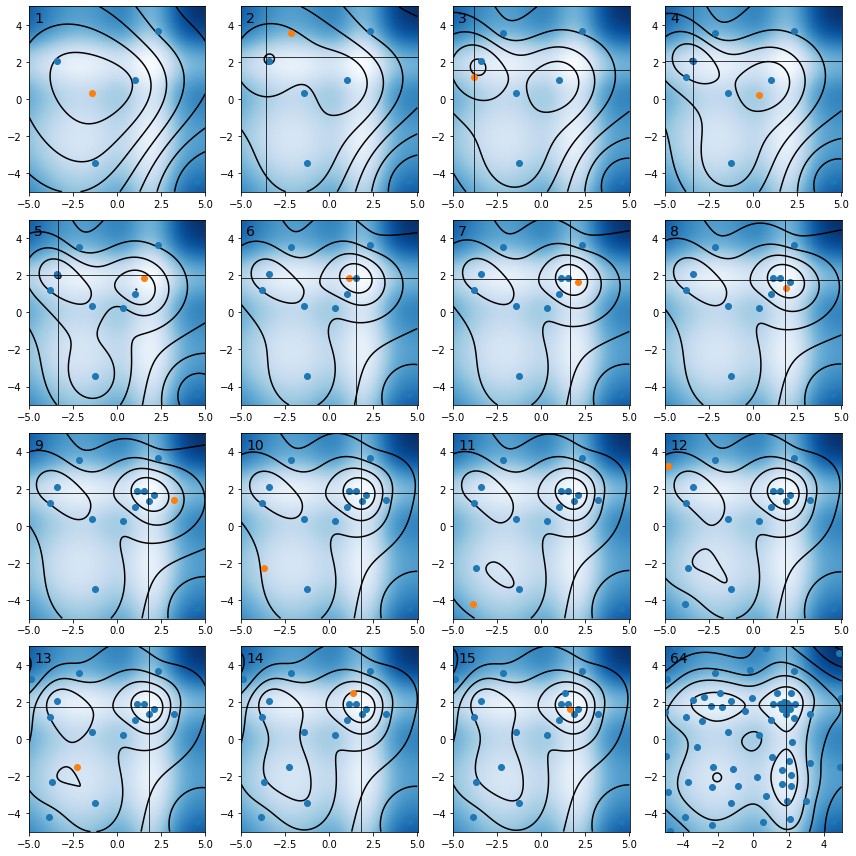

In [6]:
np.random.seed(42)

n_panel = 4
fig, axes = plt.subplots(n_panel, n_panel, figsize=(12, 12))

result = bayes_minimize(test_objective_2D,
    n_iter=100,
    rtol=1e-6,
    bounds_list=np.array([[-5, 5], [-5, 5]]),
    kernel=Matern32Kernel(1, ndim=2),
    plot_args=(axes, np.array([
        np.linspace(-5, 5, 500),
        np.linspace(-5, 5, 500)])),
    warnings=False, full_output=True)

print(f"location of minimum: {result[0]}")
print(f"{len(result[2])} model evaluations")

plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.tight_layout()
plt.show()

### Scikit-Optimize

In [7]:
from skopt import gp_minimize

In [8]:
np.random.seed(42)

global_best_y = np.inf
global_best_x = np.full(2, np.nan)

def callback(result):
    global global_best_y
    global global_best_x
    n_iter = len(result.func_vals)
    if n_iter > 1:
        best_y = result.fun        
        best_x = np.array(result.x)
        if best_y < global_best_y:
            ytol = global_best_y - best_y
            xtol = np.linalg.norm((best_x - global_best_x)/best_x)
            print(f"INFO {n_iter} {xtol} {ytol} {best_y}")
            if ytol < 1e-6: # convergence criterion
                return True
            global_best_y = best_y
            global_best_x = best_x

result = gp_minimize(test_objective_2D,
    dimensions=np.array([[-5., 5.], [-5., 5.]]),
    n_calls=100,
    acq_func="EI",
    acq_optimizer="lbfgs",
    xi=0,
    noise=1e-10,
    callback=callback)

print(f"location of minimum: {result.x}")
print(f"{len(result.x_iters)} model evaluations")

INFO 2 nan inf -0.2981459964218032
INFO 5 1.818764814079045 0.0836618075265173 -0.38180780394832053
INFO 11 0.05944628310681577 0.0034768494817837836 -0.3852846534301043
INFO 13 0.3268524524362506 0.08782027945056348 -0.4731049328806678
INFO 17 0.35451757696751685 0.014044353891371042 -0.48714928677203884
INFO 20 0.15649744875941315 0.012078960783461379 -0.4992282475555002
INFO 29 0.05634122998156466 0.00013885222475135128 -0.49936709978025157
INFO 37 2.8199566197533845 0.0002653851199369561 -0.4996324849001885
INFO 39 2.0838997891885236 0.09693634628105663 -0.5965688311812452
INFO 42 0.06254776819654531 0.0024425266892071917 -0.5990113578704523
INFO 50 0.008603410131613838 6.258857469287893e-05 -0.5990739464451452
INFO 64 0.0009285598397556302 6.611961275160283e-07 -0.5990746076412727
location of minimum: [1.82974270870581, 1.829829986876268]
64 model evaluations
